<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/try/%E8%BB%8A%E7%89%8C%E5%BA%A7%E6%A8%99%E6%88%AA%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import numpy

os.mkdir("/content/plate_train_data")
os.mkdir("/content/plate_train_data/images")
os.mkdir("/content/plate_train_data/labels")
os.mkdir("/content/plate_train_data/images/train")
os.mkdir("/content/plate_train_data/images/val")
os.mkdir("/content/plate_train_data/labels/train")
os.mkdir("/content/plate_train_data/labels/val")

In [ ]:
import xml.etree.ElementTree as ET
from xml.dom.minidom import parse

path = "/content/drive/MyDrive/AI/dataset/CarLicensePlateDetection/annotations"
classes = {"licence":0}

for annotations in os.listdir(path):
    dom = parse(os.path.join(path,annotations))
    root = dom.documentElement
    filename = ".txt".join(root.getElementsByTagName("filename")[0].childNodes[0].data.split(".png"))
    image_width = root.getElementsByTagName("width")[0].childNodes[0].data
    image_height = root.getElementsByTagName("height")[0].childNodes[0].data
    with open("/content/plate_train_data/labels/train/"+filename,"w") as r:
        for items in root.getElementsByTagName("object") :
            name = items.getElementsByTagName("name")[0].childNodes[0].data
            xmin = items.getElementsByTagName("xmin")[0].childNodes[0].data
            ymin = items.getElementsByTagName("ymin")[0].childNodes[0].data
            xmax = items.getElementsByTagName("xmax")[0].childNodes[0].data
            ymax = items.getElementsByTagName("ymax")[0].childNodes[0].data
            x_center_norm = ((int(xmin)+int(xmax)) / 2 ) / int(image_width)
            y_center_norm = ((int(ymin)+int(ymax))/2) / int(image_height)
            width_norm = ((int(xmax)-int(xmin))/int(image_width))
            height_norm = ((int(ymax)-int(ymin))/int(image_height))
            r.write(str(classes[name])+" ")
            r.write(str(x_center_norm)+" ")
            r.write(str(y_center_norm)+" ")
            r.write(str(width_norm)+" ")
            r.write(str(height_norm)+"\n")

In [ ]:
import shutil
path = "/content/drive/MyDrive/AI/dataset/CarLicensePlateDetection/images"

for images in os.listdir(path):
  image_path = os.path.join(path,images)
  shutil.copy(image_path,"/content/plate_train_data/images/train/"+images)

In [ ]:
from random import shuffle
from glob import glob
import random
import shutil

random.seed(42)
files = glob("/content/plate_train_data/images/train/*.png")
shuffle(files)
txt_train_path = "/content/plate_train_data/labels/train/"
img_train_path = "/content/plate_train_data/images/train/"
txt_val_path = "/content/plate_train_data/labels/val/"
img_val_path = "/content/plate_train_data/images/val/"
for i in files[:120]:
    filename = i.split("/")[-1]
    shutil.move(txt_train_path+filename.replace(".png",".txt"),\
                txt_val_path+filename.replace(".png",".txt"))
    shutil.move(img_train_path+filename,img_val_path+filename)

In [ ]:
%cd /content

/content


In [ ]:
!echo "train: /content/plate_train_data/images/train" > licence.yaml
!echo "val:   /content/plate_train_data/images/val"  >> licence.yaml
!echo "nc : 1" >> licence.yaml
!echo "names: ['licence']" >> licence.yaml

In [ ]:
%cd /content/
%rm -rf yolov5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 16517 (delta 47), reused 54 (delta 17), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.17 MiB | 24.58 MiB/s, done.
Resolving deltas: 100% (11304/11304), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
!python train.py --weights yolov5s.pt --cfg models/yolov5s.yaml --img 416 --batch 48 --epochs 40 --data /content/licence.yaml  --cache

2024-03-12 03:12:56.169756: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 03:12:56.169825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 03:12:56.171801: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/licence.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=48, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --conf 0.25 --img-size 640 --source /content/drive/MyDrive/車牌/car888.jpg

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/車牌/car888.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/車牌/car888.jpg: 448x640 1 licence, 48.9ms
Speed: 0.6ms pre-process, 48.9ms inference, 567.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


In [2]:
import cv2
import torch
from PIL import Image
from pathlib import Path

In [45]:
#直接用輸出的照片截圖，成功但照片出不來

import cv2
from matplotlib import pyplot as plt

# 讀取圖片
image = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp4/car888.jpg')

# 轉換顏色空間從BGR到HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定義紅色的HSV範圍
lower_red = (0, 100, 100)
upper_red = (10, 255, 255)

# 利用HSV範圍找出紅色區域的mask
mask = cv2.inRange(hsv, lower_red, upper_red)

# 找出紅色區域的輪廓
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 如果找到了輪廓
if contours:
    # 假設只有一個紅色物件，取第一個輪廓
    red_contour = contours[0]

    # 計算輪廓的邊界框
    x, y, w, h = cv2.boundingRect(red_contour)

    # 裁剪圖像
    cropped_image = image[y:y+h, x:x+w]

    # 輸出座標
    print("紅色框左上角座標：({}, {})".format(x, y))
    print("紅色框右下角座標：({}, {})".format(x + w, y + h))

    # 顯示裁剪後的圖像
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("未找到紅色物件。")


紅色框左上角座標：(53, 125)
紅色框右下角座標：(55, 127)


In [41]:
#用權重偵測車牌在截圖但用不出來
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 載入模型權重
model_path = '/content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt'
checkpoint = torch.load(model_path)
model = checkpoint['model']

# 將模型的權重轉換為與輸入張量相同的類型
model.to(torch.float32)

# 將模型設定為評估模式
model.eval()

# 讀取圖像
image_path = '/content/drive/MyDrive/車牌/car888.jpg'
image = Image.open(image_path)

# 將圖像轉換為張量並正確地規範化
transform = transforms.Compose([
    transforms.Resize((416, 416)),  # 將圖像大小調整為模型預期的大小
    transforms.ToTensor(),           # 將圖像轉換為張量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 正規化
])
image_tensor = transform(image).unsqueeze(0)  # 添加批次維度

# 進行目標檢測
with torch.no_grad():
    results = model(image_tensor)

# 顯示偵測結果
# 取得車牌框的座標

for result in results:
    for detection in result:
        if detection[2].item() == 2:  # 假設類別2代表車牌
            x1, y1, x2, y2 = detection[:4].int().tolist()
            print(f"車牌框的座標：({x1}, {y1}), ({x2}, {y2})")

            # 顯示圖像
            plt.imshow(image)
            ax = plt.gca()

            # 添加矩形框
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

            plt.axis('off')  # 不顯示座標軸
            plt.show()


RuntimeError: a Tensor with 6 elements cannot be converted to Scalar

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-22 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
WARNING ⚠️ NMS time limit 0.550s exceeded


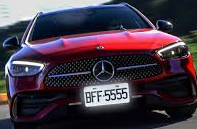

In [32]:
#成功(用這個可以利用yolov5本身偵測出車子，然後計算出車子座標並擷取)

import cv2
from google.colab.patches import cv2_imshow
import torch
from PIL import Image

# 載入YOLOv5模型
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# 讀取原始圖像
original_image = cv2.imread("/content/drive/MyDrive/車牌/car888.jpg")

# 將原始圖像轉換為PIL格式
image_pil = Image.fromarray(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

# 進行目標檢測
results = model(image_pil)

# 取得車牌框的座標
plate_boxes = []
for detection in results.xyxy[0]:
    if detection[5] == 2:  # 假設類別2代表車牌
        x1, y1, x2, y2 = detection[:4].int().tolist()
        plate_boxes.append((x1, y1, x2, y2))

# 擷取車牌位置的部分
if plate_boxes:
    x1, y1, x2, y2 = plate_boxes[0]  # 假設只有一個車牌框
    plate_region = original_image[y1:y2, x1:x2]

    # 顯示擷取的車牌位置的部分
    cv2_imshow(plate_region)
else:
    print("未偵測到車牌框")